In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the dataset
df = pd.read_csv('./data/heart.csv')

In [4]:
df.head() # displays first five rows of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# check the number of rows and columns in the dataset
df.shape

(1025, 14)

In [6]:
# dataset general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# check for missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

> The dataset has no missing data.

### Basic Statistics 

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### EDA

#### Explore the target column

In [9]:
df['target'].value_counts(normalize=True)

1    0.513171
0    0.486829
Name: target, dtype: float64

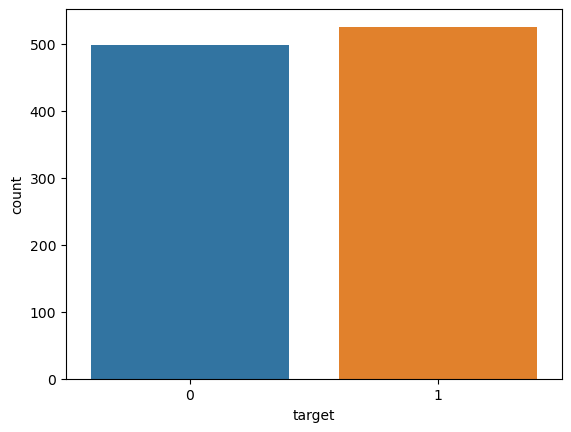

In [10]:
#visualize target variable
sns.countplot(x="target", data=df)
plt.show()

> The target column is fairly balance for the model training

### Age Variable

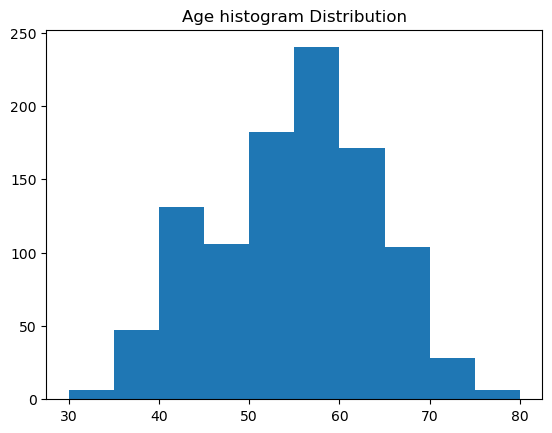

In [11]:
bins = np.arange(30, df['age'].max()+5, 5)
plt.hist(df['age'], bins = bins)
plt.title('Age histogram Distribution')
plt.show()

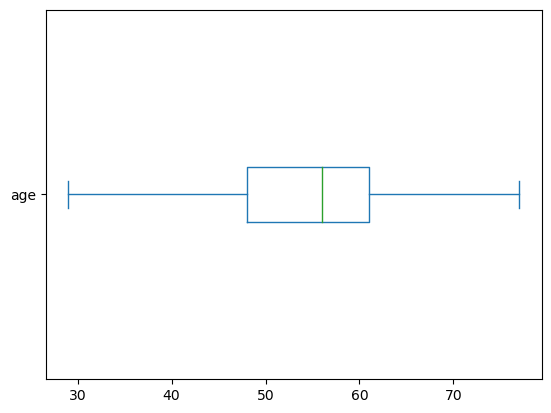

In [12]:
## Box plot
df['age'].plot(kind='box', vert=False);

> The age distribution is uniform, (uniformly distributed)

 ### Gender Distribution

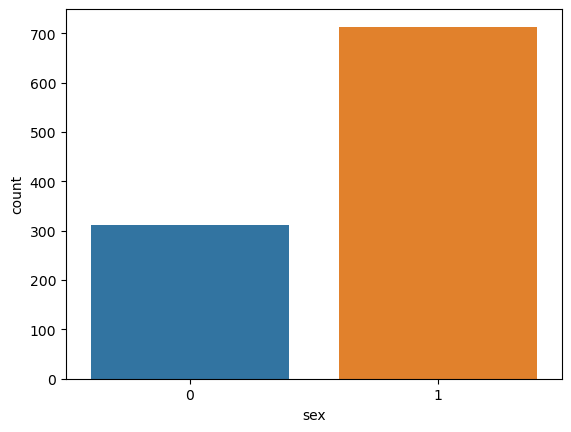

In [13]:
sns.countplot(x="sex", data=df)
plt.show()

In [14]:
df['sex'].value_counts(normalize=True)

1    0.69561
0    0.30439
Name: sex, dtype: float64

> There more males in the dataset about 69.56% and 30.44%

### Chest pain type.

In [15]:
df['cp'].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

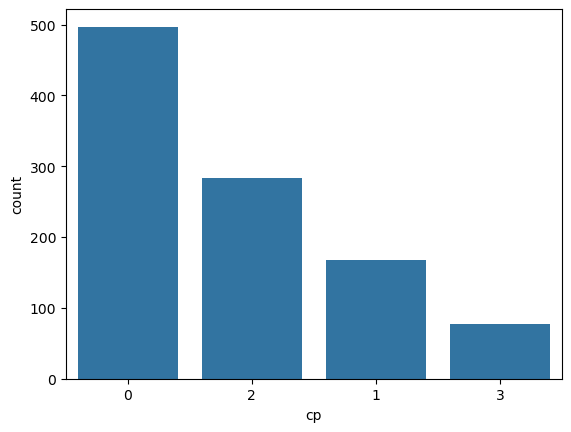

In [16]:
## plot Chest pain type
base_color = sns.color_palette()[0]
chest_pain_type_order = df['cp'].value_counts().index
sns.countplot(data=df, x='cp', color=base_color, order=chest_pain_type_order);

### Resting blood pressure

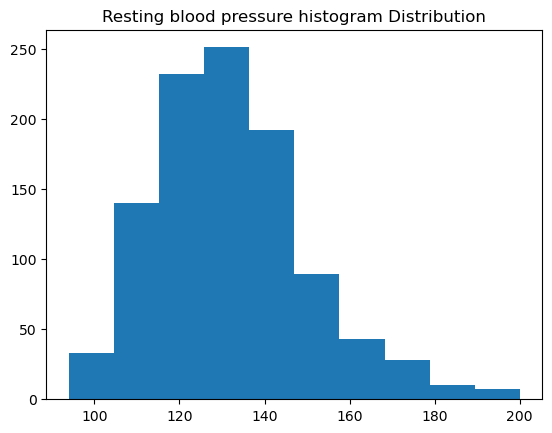

In [17]:
plt.hist(df['trestbps'])
plt.title('Resting blood pressure histogram Distribution')
plt.show()

>  Resting blood pressure has a left skewed data distribution.

### serum cholestoral in mg/dl

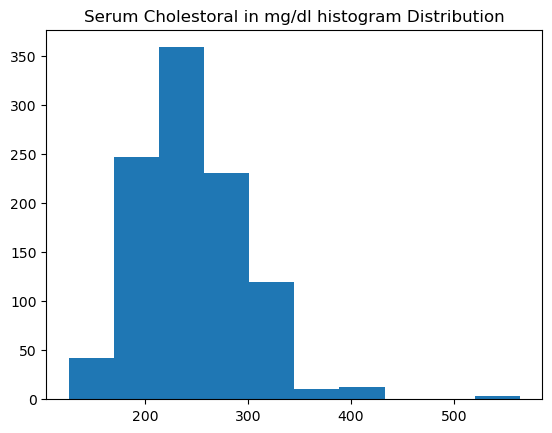

In [18]:
plt.hist(df['chol'])
plt.title('Serum Cholestoral in mg/dl histogram Distribution')
plt.show()

### (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

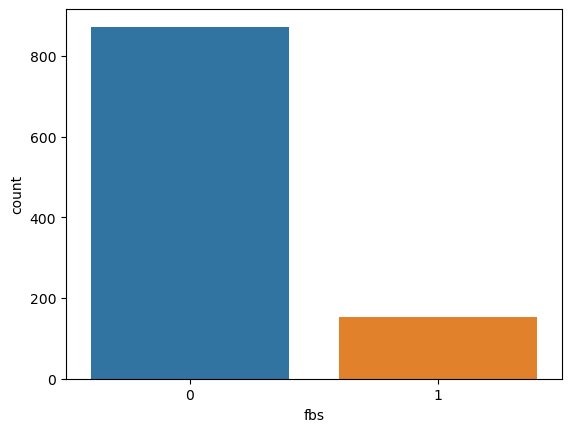

In [19]:
sns.countplot(x="fbs", data=df)
plt.show()

### resting electrocardiographic results

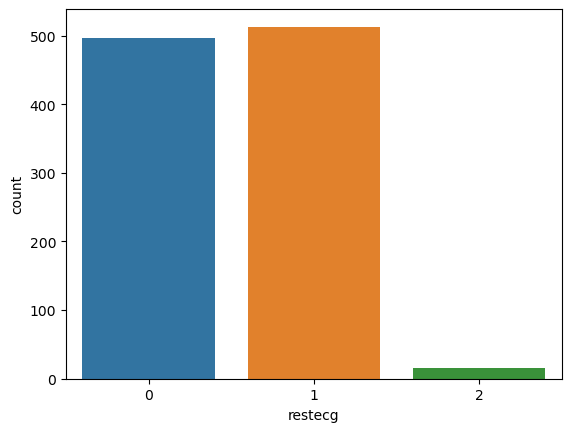

In [20]:
sns.countplot(x="restecg", data=df)
plt.show()

### maximum heart rate achieved

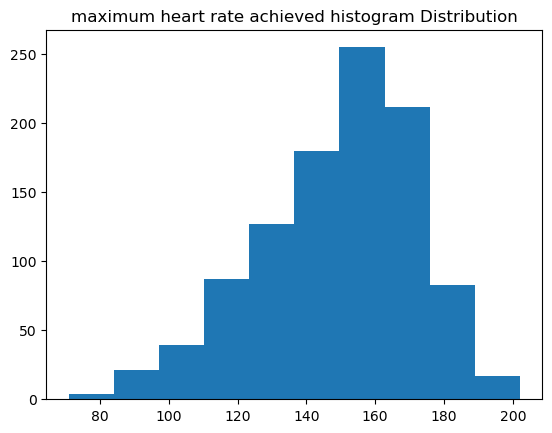

In [21]:
plt.hist(df['thalach'])
plt.title('maximum heart rate achieved histogram Distribution')
plt.show()

### exercise induced angina (1 = yes; 0 = no)

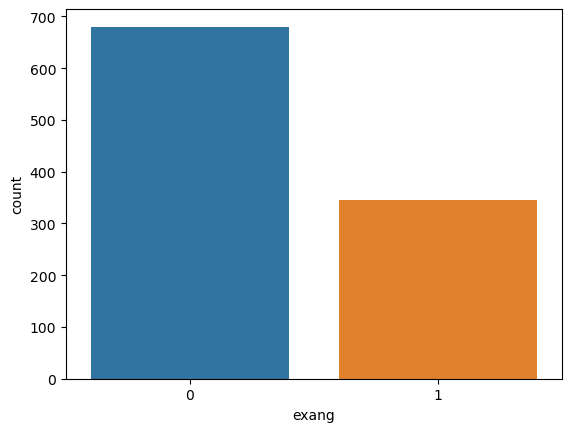

In [22]:
sns.countplot(x="exang", data=df)
plt.show()

### ST depression induced by exercise relative to rest

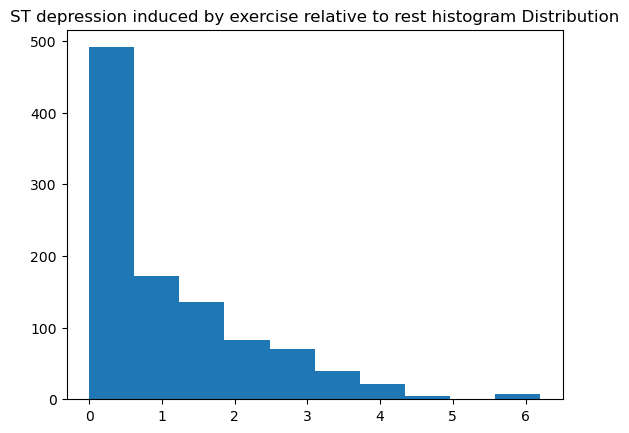

In [23]:
bins = np.arange(30, df['oldpeak'].max()+5, 5)
plt.hist(df['oldpeak'])
plt.title('ST depression induced by exercise relative to rest histogram Distribution')
plt.show()

In [24]:
X = df.drop('target', axis=1)
y = df['target']

In [25]:
# Feature selection using wrapper method
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
# Selecting top 5 features using Recursive Feature Elimination (RFE)
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=5, step=1)
X_rfe = rfe.fit_transform(X, y)

In [27]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, stratify=X['sex'], random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Hyperparameter tuning using Grid Search for Logistic Regression
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['liblinear']}
logreg = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)
logreg.fit(X_train, y_train)
logreg_accuracy = logreg.score(X_test, y_test)

# Logistic Regression classification report
logreg_pred = logreg.predict(X_test)
print("Logistic Regression classification report:\n", classification_report(y_test, logreg_pred))

# Calculate sensitivity and specificity
tn, fp, fn, tp = confusion_matrix(y_test, logreg_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", logreg_accuracy)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Hyperparameter tuning using Grid Search for Random Forest
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [2, 4, 6, 8], 'criterion': ['gini', 'entropy']}
rf_clf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
rf_clf.fit(X_train, y_train)
rf_accuracy = rf_clf.score(X_test, y_test)

# Random Forest classification report
rf_pred = rf_clf.predict(X_test)
print("Random Forest classification report:\n", classification_report(y_test, rf_pred))

# Calculate sensitivity and specificity
tn, fp, fn, tp = confusion_matrix(y_test, rf_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)


Random Forest classification report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       100
           1       0.91      0.83      0.87       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205

Sensitivity: 0.8285714285714286
Specificity: 0.91
Accuracy: 0.8682926829268293


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Hyperparameter tuning using Grid Search for Decision Tree
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8]}
tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5)
tree_clf.fit(X_train, y_train)
tree_accuracy = tree_clf.score(X_test, y_test)

# Decision Tree classification report
tree_pred = tree_clf.predict(X_test)
print("Decision Tree classification report:\n", classification_report(y_test, tree_pred))

# Calculate sensitivity and specificity
tn, fp, fn, tp = confusion_matrix(y_test, tree_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)


Decision Tree classification report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       100
           1       0.90      0.85      0.87       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205

Sensitivity: 0.8476190476190476
Specificity: 0.9
Accuracy: 0.8731707317073171


In [31]:
# Print accuracy for each classifier
print("Logistic Regression accuracy:", logreg_accuracy)
print("Decision Tree accuracy:", tree_accuracy)
print("Random Forest accuracy:", rf_accuracy)


Logistic Regression accuracy: 0.8097560975609757
Decision Tree accuracy: 0.8731707317073171
Random Forest accuracy: 0.8682926829268293


In [32]:
best_accuracy = max(logreg_accuracy, tree_accuracy, rf_accuracy)
print("Best accuracy:", best_accuracy)
if best_accuracy == logreg_accuracy:
    print("Classifier: Logistic Regression")
elif best_accuracy == tree_accuracy:
    print("Classifier: Decision Tree")
else:
    print("Classifier: Random Forest")

Best accuracy: 0.8731707317073171
Classifier: Decision Tree
